<a href="https://www.kaggle.com/code/samithsachidanandan/pytorch-time-sequence-prediction-with-lstm?scriptVersionId=283873724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing the Libraries 

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim 
import matplotlib.pyplot as plt 

In [2]:
N = 100
L =1000
T = 20

x = np.empty((N, L), np.float32)
x[:] = np.array(range(L)) + np.random.randint(-4*T, 4*T, N).reshape(N,1)
y = np.sin(x/1.0/T).astype(np.float32)

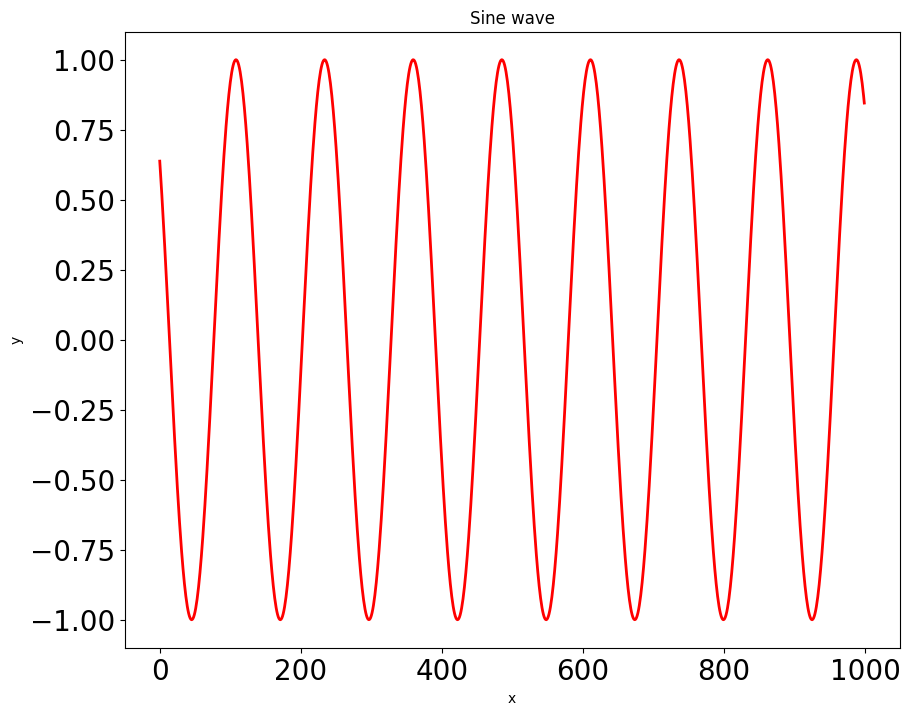

In [3]:
plt.figure(figsize=(10,8))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]), y[0,:], 'r', linewidth=2.0)
plt.show()

In [4]:
class LSTMPredictor(nn.Module):
    def __init__(self, n_hidden=51):
        super(LSTMPredictor, self).__init__()
        self.n_hidden = n_hidden
        # lstm1, lstm2, linear
        self.lstm1 = nn.LSTMCell(1, self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden, self.n_hidden)
        self.linear = nn.Linear(self.n_hidden, 1)

    def forward(self, x, future=0):
        outputs = []
        n_samples = x.size(0)

        h_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        h_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
        c_t2 = torch.zeros(n_samples, self.n_hidden, dtype=torch.float32)
            
        for input_t in x.split(1, dim=1):
            #N, 1
            h_t, c_t = self.lstm1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        for i in range(future):
            
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs.append(output)

        outputs = torch.cat(outputs, dim = 1)
        return outputs
        
        


Step 0
loss 0.49935075640678406
loss 0.49441400170326233
loss 0.4686790406703949
loss 0.4322671592235565
loss 0.32559338212013245
loss 0.15628765523433685
loss 0.07234754413366318
loss 0.026383357122540474
loss 0.025579748675227165
loss 0.025037813931703568
loss 0.024370107799768448
loss 0.0227979626506567
loss 0.019905969500541687
loss 0.015044381842017174
loss 0.007924406789243221
loss 0.006931946612894535
loss 0.006395426113158464
loss 0.005556128453463316
loss 0.0047464328818023205
loss 0.003977349493652582
test loss 0.002897213213145733


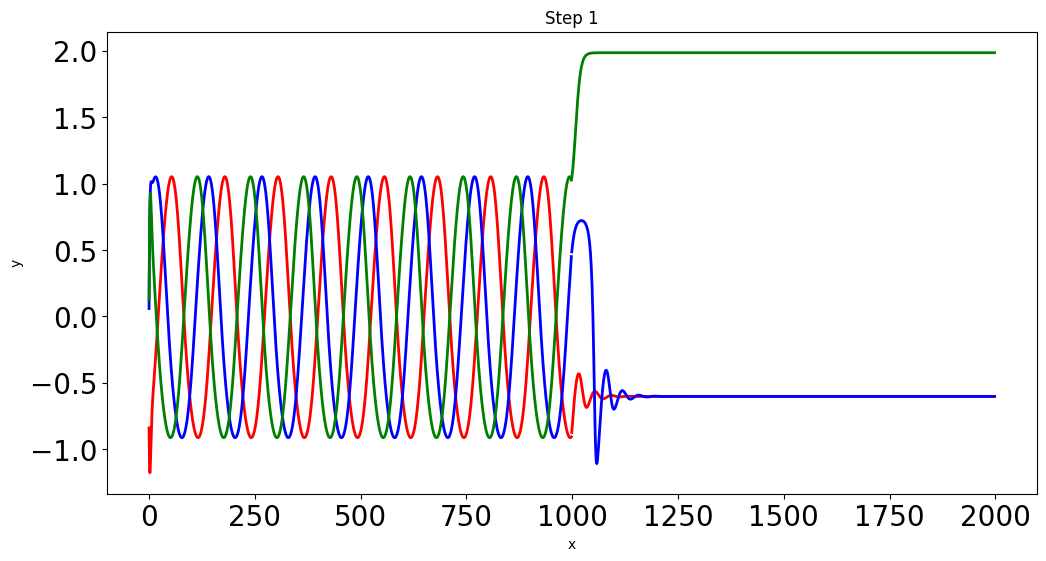

Step 1
loss 0.002897213213145733
loss 0.0013332789530977607
loss 0.0008812175365164876
loss 0.0007553669856861234
loss 0.0007365340716205537
loss 0.0007329098298214376
loss 0.0007270929636433721
loss 0.0007136588683351874
loss 0.0006849548080936074
loss 0.0006241851951926947
loss 0.0005063174176029861
loss 0.00044676283141598105
loss 0.00038387413951568305
loss 0.0003610671265050769
loss 0.0003321042167954147
loss 0.00030433028587140143
loss 0.0002777183835860342
loss 0.00025791890220716596
loss 0.00023104161664377898
loss 0.0002344548556720838
test loss 0.0002024055429501459


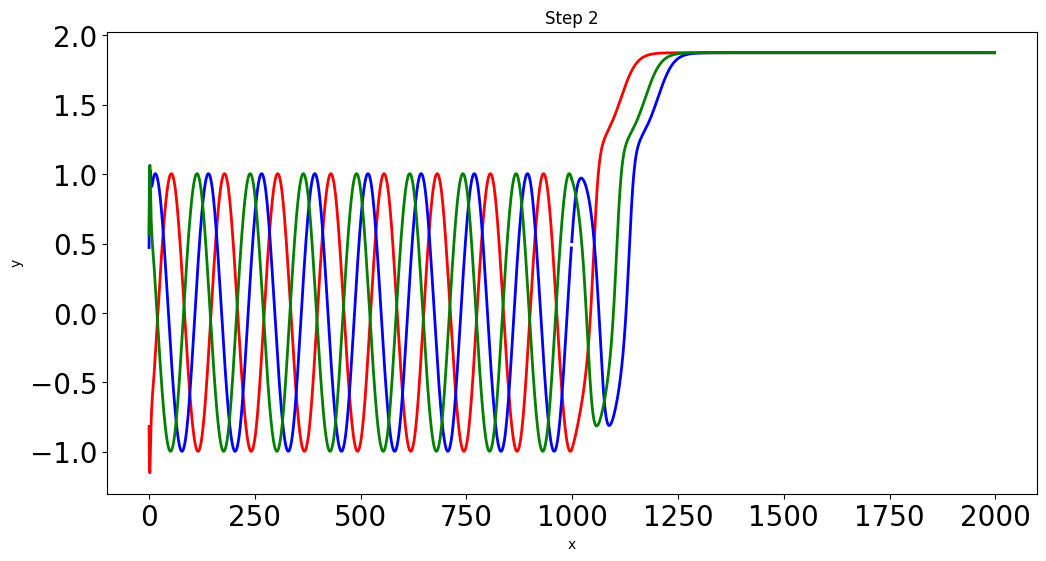

Step 2
loss 0.0002024055429501459
loss 0.0001926733530126512
loss 0.00017912725161295384
loss 0.00017255943384952843
loss 0.00016894204600248486
loss 0.0001668966724537313
loss 0.00016593732289038599
loss 0.0001653649378567934
loss 0.00016482299542985857
loss 0.00016404883353970945
loss 0.00016367661010008305
loss 0.00016339543799404055
loss 0.00016287270409520715
loss 0.00016179410158656538
loss 0.00015925904153846204
loss 0.00015470020298380405
loss 0.0001421657216269523
loss 0.00014860402734484524
loss 0.00012773426715284586
loss 0.0001325963094132021
test loss 0.00012052396778017282


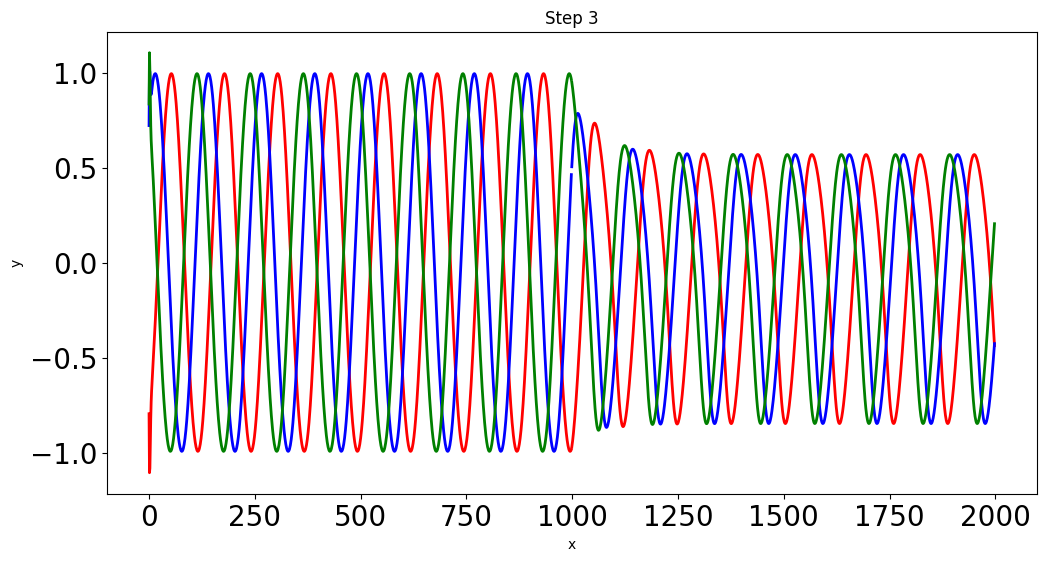

Step 3
loss 0.00012052396778017282
loss 0.00011592480586841702
loss 0.00011318728502374142
loss 0.00011095230729551986
loss 0.00010836237197509035
loss 0.00010593558545224369
loss 0.00010324791219318286
loss 0.00010497478069737554
loss 0.00010173378541367128
loss 0.00010140991798834875
loss 0.00010013370047090575
loss 9.929306543199345e-05
loss 9.74111826508306e-05
loss 9.605089871911332e-05
loss 9.490802767686546e-05
loss 9.455663530388847e-05
loss 9.415109525434673e-05
loss 9.380697883898392e-05
loss 9.170185512630269e-05
loss 8.843597606755793e-05
test loss 9.193530422635376e-05


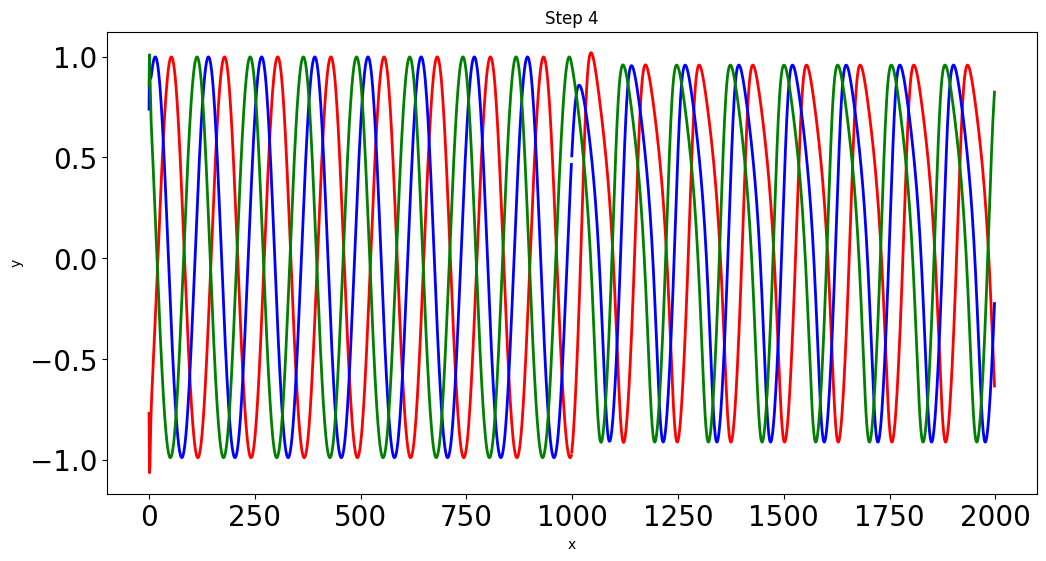

Step 4
loss 9.193530422635376e-05
loss 8.115969831123948e-05
loss 7.82646457082592e-05
loss 6.685777043458074e-05
loss 6.47294000373222e-05
loss 6.270467565627769e-05
loss 6.177300383569673e-05
loss 5.887898078071885e-05
loss 5.515939119504765e-05
loss 5.2678995416499674e-05
loss 4.98908048029989e-05
loss 4.844040086027235e-05
loss 4.6989898692118004e-05
loss 4.5268032408785075e-05
loss 4.0512495615985245e-05
loss 3.877208291669376e-05
loss 3.776096855290234e-05
loss 3.733677658601664e-05
loss 3.71282767446246e-05
loss 3.679861401906237e-05
test loss 3.661598384496756e-05


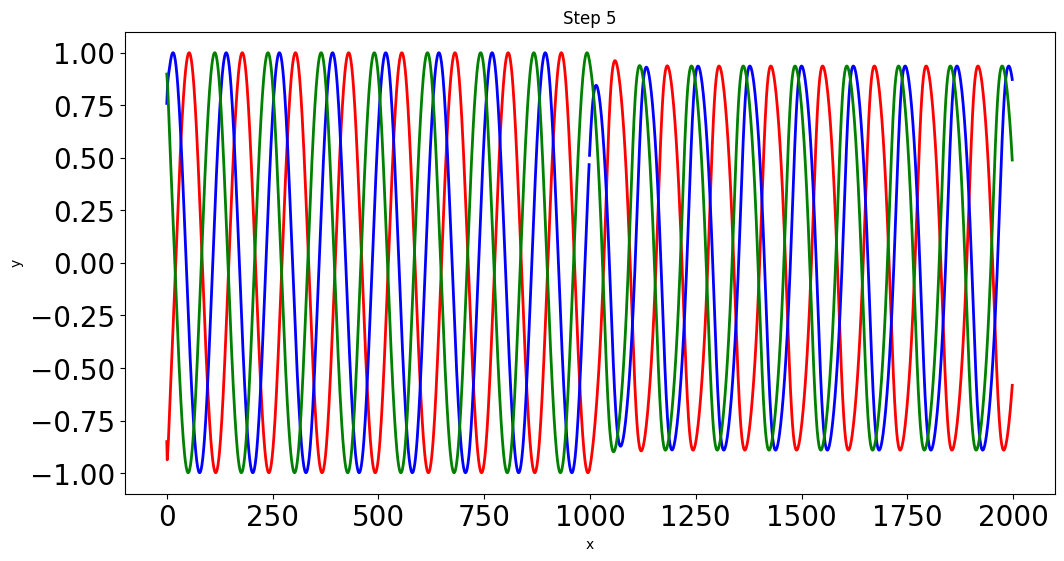

Step 5
loss 3.661598384496756e-05
loss 3.645498145488091e-05
loss 3.631380604929291e-05
loss 3.6144872865406796e-05
loss 3.597609611460939e-05
loss 3.516282595228404e-05
loss 3.070340972044505e-05
loss 2.7745601983042434e-05
loss 2.6566049200482666e-05
loss 2.567136471043341e-05
loss 2.5512566935503855e-05
loss 2.5260738766519353e-05
loss 2.5221106625394896e-05
loss 2.519773624953814e-05
loss 2.5144701794488356e-05
loss 2.5072222342714667e-05
loss 2.4934672183007933e-05
loss 2.4660146664245985e-05
loss 2.4011127607082017e-05
loss 2.29285051318584e-05
test loss 2.108612170559354e-05


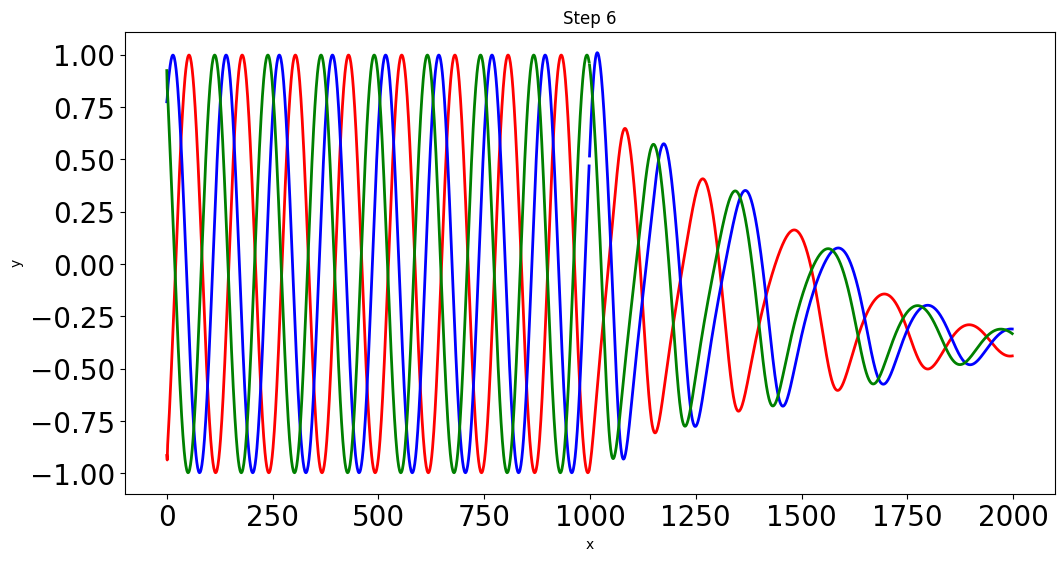

Step 6
loss 2.108612170559354e-05
loss 1.7353631847072393e-05
loss 2.6843166779144667e-05
loss 1.8483637177268974e-05
loss 2.50682369369315e-05
loss 2.0371209757286124e-05
loss 0.00017915925127454102
loss 1.4912729056959506e-05
loss 1.4049530363990925e-05
loss 1.313169104832923e-05
loss 1.2122230145905633e-05
loss 1.0900917914113961e-05
loss 1.0556833331065718e-05
loss 1.0281436516379472e-05
loss 9.899741598928813e-06
loss 9.697304449218791e-06
loss 9.610116649128031e-06
loss 9.555739779898431e-06
loss 9.510488780506421e-06
loss 9.474890248384327e-06
test loss 9.445599062019028e-06


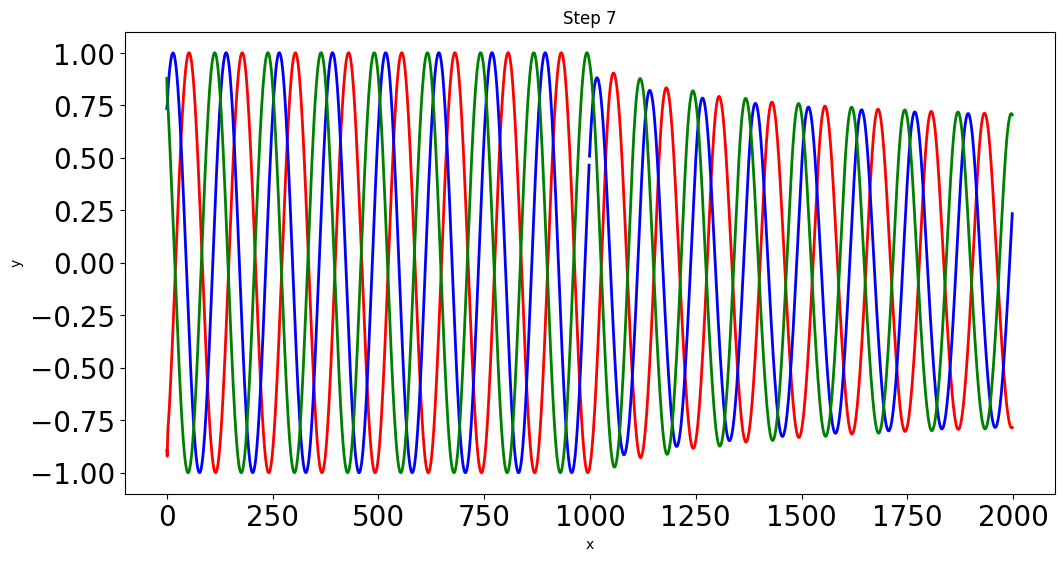

Step 7
loss 9.445599062019028e-06
loss 9.410909115104005e-06
loss 9.290076377510559e-06
loss 9.06000059330836e-06
loss 8.680333849042654e-06
loss 8.233580956584774e-06
loss 7.799992090440355e-06
loss 7.402894880215172e-06
loss 7.3410574259469286e-06
loss 7.1025970100890845e-06
loss 6.9948737291269936e-06
loss 6.92176581651438e-06
loss 6.881934041302884e-06
loss 6.852310434624087e-06
loss 6.822122941230191e-06
loss 6.803356427553808e-06
loss 6.793284228479024e-06
loss 6.785810001019854e-06
loss 6.774728717573453e-06
loss 6.756999027857091e-06
test loss 6.727813797624549e-06


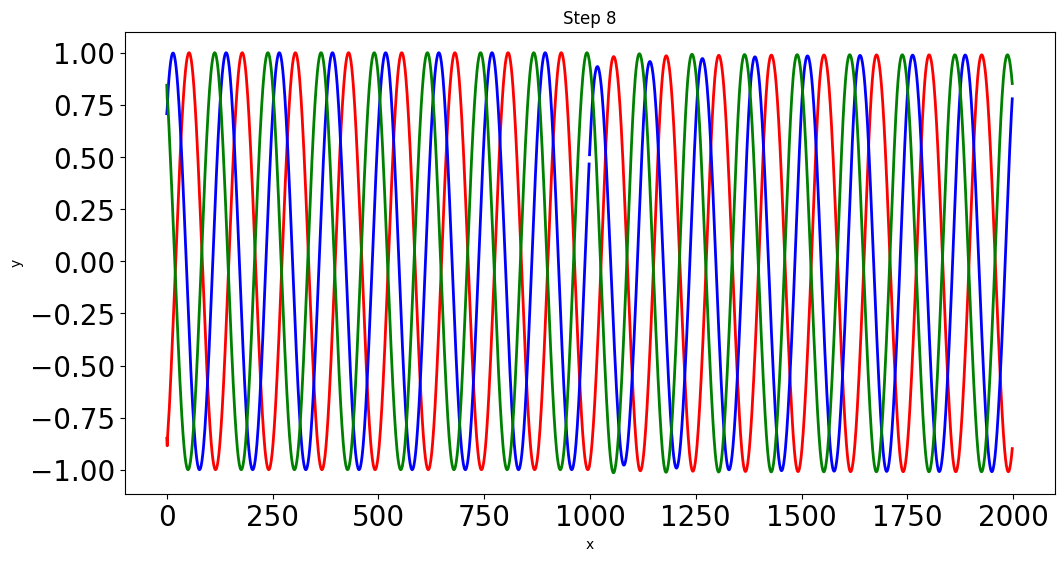

Step 8
loss 6.727813797624549e-06
loss 6.683875199087197e-06
loss 6.629383733525174e-06
loss 6.574931376235327e-06
loss 6.534259227919392e-06
loss 6.515247150673531e-06
loss 6.509580543934135e-06
loss 6.50746460451046e-06
test loss 6.50746460451046e-06


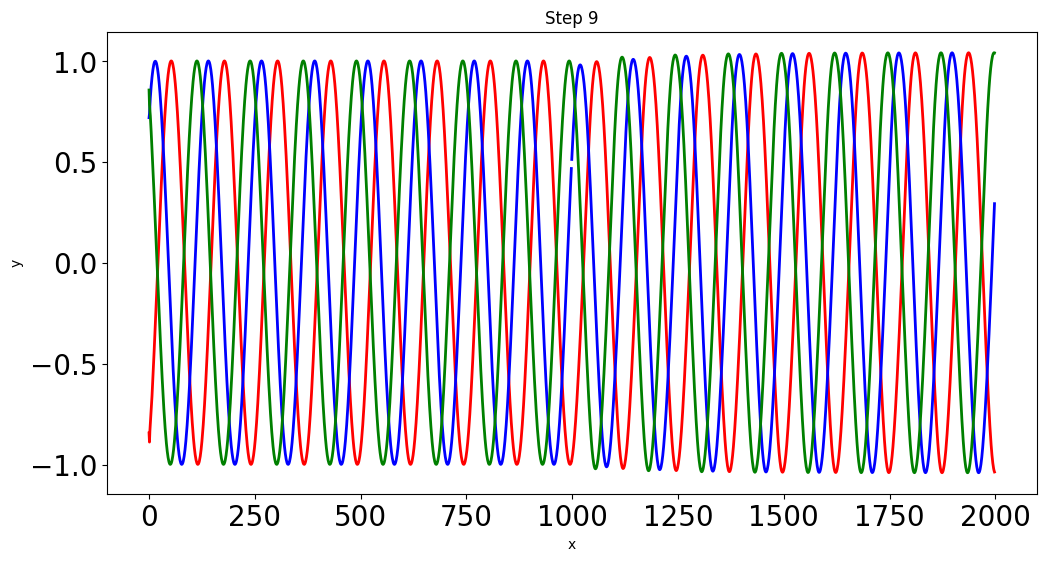

Step 9
loss 6.50746460451046e-06
test loss 6.50746460451046e-06


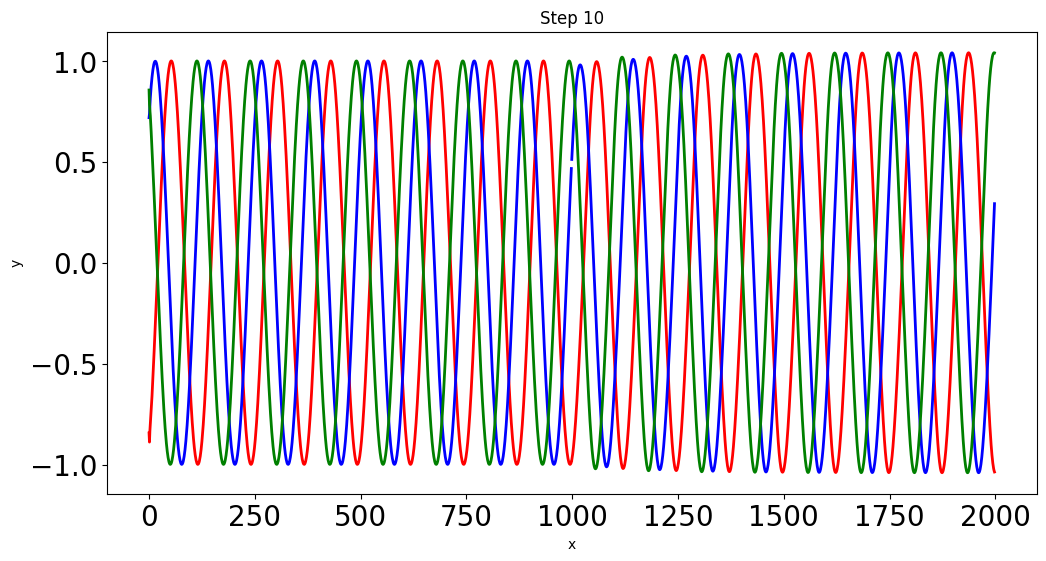

In [5]:
if __name__ == "__main__":
    train_input = torch.from_numpy(y[3:, :-1])
    train_target = torch.from_numpy(y[3:, 1:])
    test_input = torch.from_numpy(y[3:, :-1])
    test_target = torch.from_numpy(y[3:, 1:])

    model = LSTMPredictor()
    criterion = nn.MSELoss()


    optimizer = optim.LBFGS(model.parameters(), lr=0.8 )

    n_steps = 10
    for i in range(n_steps):

        print("Step", i)

        def closure():
            optimizer.zero_grad()
            out = model(train_input)
            loss = criterion(out, train_target)
            print("loss", loss.item())
            loss.backward()
            return loss
            
        optimizer.step(closure)

        with torch.no_grad():
            future=1000
            pred = model(test_input, future=future)
            loss = criterion(pred[:, :-future], test_target)
            print("test loss", loss.item())
            y = pred.detach().numpy()

        plt.figure(figsize=(12,6))
        plt.title(f"Step {i+1}")
        plt.xlabel("x") 
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        n = train_input.shape[1]

       

        def draw(y_i, color):
            plt.plot(np.arange(n), y_i[:n], color, linewidth=2.0)
            plt.plot(np.arange(n, n+future), y_i[n:n+future], color, linewidth=2.0)

        draw(y[0], 'r')
        draw(y[1], 'b')
        draw(y[2], 'g')

        plt.savefig("predict%d.pdf"%i)
        plt.show()
        plt.close()